
### Importing Packages for the Project

In [1]:
# Basic packages required for data manipulation and Feature Engineering

import pandas as pd
import numpy as np
# for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import pylab as py

# statistical package for conducting hypothesis tests and other tasks 
import statsmodels.api as sm
from scipy.stats import chi2_contingency
from scipy.stats import norm

#package for model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 


In [80]:
#package for Feature Engeeniring/Categorical Data Transformation
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE

In [8]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading the data ustilised for training the model

In [3]:
#df=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/finaldata.csv")
df=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/finaldata.csv")
#df_1=pd.read_csv("D:/Sitanshu/Python/Twitter_Bot_Classification/model_data.csv")
df_1=pd.read_csv("~/virtualenv/Twitter_Project/Twitter_Bot_Classification/model_data.csv")
df_1 = df_1.drop('Unnamed: 0', axis =1)
df.drop(['Unnamed: 0', 'crawled_at', 'contributors_enabled','testset', 'random', 'default_profile_image', 'notifications', 'following', 'follow_request_sent', 'is_translator'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 34 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  11017 non-null  int64  
 1   name                                11016 non-null  object 
 2   screen_name                         11017 non-null  object 
 3   statuses_count                      11017 non-null  int64  
 4   followers_count                     11017 non-null  int64  
 5   friends_count                       11017 non-null  int64  
 6   favourites_count                    11017 non-null  int64  
 7   listed_count                        11017 non-null  int64  
 8   url                                 3508 non-null   object 
 9   lang                                10017 non-null  object 
 10  time_zone                           5015 non-null   object 
 11  location                            4908 

In [11]:
#if not using df_1 then uncomment

# manipulating target variable by putting 0 and 1 values
#df.loc[df["Category"] == 'genuine', "class"] = "0"
#df.loc[df["Category"] != 'genuine', "class"] = "1"

In [21]:
df_model = df[['id','screen_name','statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']]

In [34]:
# Dropping id column is viable option as it doesn't add value to the data
#df_model.set_index('id', inplace = True)
#df.set_index('id', inplace = True)
#df_1.set_index('id', inplace = True)

##### Ignore warning should be implemented or not?

In [6]:
df_model['description_present'] = df_1['description_presence']
df_model['age'] = df_1['age']
df_model['class'] = df_1['class']

<ipython-input-6-13a7ddabf1b0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['description_present'] = df_1['description_presence']
<ipython-input-6-13a7ddabf1b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['age'] = df_1['age']
<ipython-input-6-13a7ddabf1b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

In [ ]:
#dropping column with description as we are not working on language and text recognition for the model.
#df = df.drop(['description'], axis = 1)

### Using EDA to create new Features

In [ ]:
df.info()

In [ ]:
pd.options.display.float_format = '{:.5f}'.format
df.describe()

In [ ]:
corrMatrix = df.corr()
sns.set(rc = {'figure.figsize':(10, 10)} )
sns.set(font_scale = 2)
sns.heatmap(corrMatrix, vmin = -1, vmax = 1, center = 0, cmap = sns.diverging_palette(20, 220, n = 200), square = True, cbar_kws = {'shrink': 0.6}, annot = True)
plt.show

In [ ]:
df.info()

In [ ]:
list = ['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count']
for i in list:
    fig = plt.figure(figsize =(7, 7)) 
    # Creating axes instance 
    ax = fig.add_axes([1, 1, 1, 1]) 
    #change of origin by adding 1 to the original data 
    ax.boxplot(np.log(df[i] + 1 ))
        


In [ ]:
list = {'statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count'}
for i in list:
    fig, ax = plt.subplots(1)
    sns.histplot(df[i]+1, bins = 100, log_scale= True, kde = True)
    #np.log(df[i]+1).plot.hist(bins = 100)


In [ ]:
from scipy import stats

In [ ]:
type(df['statuses_count'])

In [ ]:
#look for details
crim_boxcox = stats.boxcox(df['statuses_count']+1)[0]

In [ ]:
sn.histplot(data = crim_boxcox, bins = 200, kde = True)

In [ ]:
pd.crosstab(df['verified'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['protected'])

In [ ]:
pd.crosstab(df['default_profile'], df['default_profile_image'])

In [ ]:
pd.crosstab(df['class'], df['verified'])

In [ ]:
pd.crosstab(df['class'], df['protected'], margins = True)

In [ ]:
pd.crosstab(df['protected'], df['verified'], margins = True)

In [ ]:
pd.crosstab(df['verified'], df['class'], margins = True)

In [ ]:
plt.clf()

In [ ]:
plt.clf()
cross = pd.crosstab(index = [df['verified'], df['protected'], df['default_profile'], df['default_profile_image']], columns = df['class'])
plt.subplots(figsize=(10,10))
plt.tick_params(labelsize = 10)
sns.heatmap(cross, cmap = 'YlOrBr', cbar_kws = {'shrink': 0.8})
cross

In [ ]:
df_bar = df[['verified', 'protected', 'class', 'default_profile', 'default_profile_image']]

fig_1 = sns.countplot(x = 'protected', data = df_bar, hue = 'class')
fig_2 = sns.countplot(x = 'default_profile', data = df_bar)
plt.show()

In [ ]:
plt.close()

In [ ]:
gc.collect()

In [ ]:
df_p

In [ ]:
df_pairplot = df[['statuses_count', 'followers_count', 'friends_count', 'favourites_count', 'listed_count', 'class']]

In [ ]:
df_pairplot['statuses_count'] = np.log(df_pairplot['statuses_count']+1)
df_pairplot['followers_count'] = np.log(df_pairplot['followers_count']+1)
df_pairplot['friends_count'] = np.log(df_pairplot['friends_count']+1)
df_pairplot['favourites_count'] = np.log(df_pairplot['favourites_count']+1)
df_pairplot['listed_count'] = np.log(df_pairplot['listed_count']+1)

In [ ]:
sns.pairplot(df_pairplot)

In [ ]:
plt.close()

In [ ]:
sns.pairplot(df_pairplot, hue = 'class')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.log(df['followers_count']+1), np.log(df['listed_count']+1), np.log(df['favourites_count']+1), c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

In [ ]:
fig = px.scatter_3d(df, x=np.log(df['statuses_count']+1), y=np.log(df['followers_count']+1), z=np.log(df['listed_count']+1),color=df['Category'],labels= True)
fig.show()

In [ ]:
fig_5 = sm.qqplot(np.log(df['favourites_count']+1), line = '45')
fig_4 = sm.qqplot(np.log(df['listed_count']+1), line = '45')
fig_3 = sm.qqplot(np.log(df['followers_count']+1), line = '45')
fig_2 = sm.qqplot(np.log(df['statuses_count']+1), line = '45')
fig_1 = sm.qqplot(np.log(df['friends_count']+1), line = '45')
plt.show()

In [ ]:
plt.scatter(np.log(df['followers_count']+1), np.log(df['friends_count']+1))

#### Feature Creation

The unique count of geo_enabled accounts classification is:


0.0    7723
1.0    3294
Name: geo_enabled, dtype: int64

<ipython-input-28-f806a4fa0494>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['geo_enabled'] = df['geo_enabled']


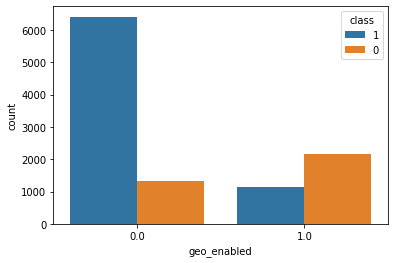

In [28]:
df['geo_enabled'] = df['geo_enabled'].fillna(0)

print('The unique count of geo_enabled accounts classification is:')
df['geo_enabled'].value_counts()
fig_1 = sns.countplot(x = 'geo_enabled', data = df, hue = "class")
df_model['geo_enabled'] = df['geo_enabled']

In [247]:
df_model['geo_enabled'] = df['geo_enabled']

<ipython-input-247-b0e292c13f1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['geo_enabled'] = df['geo_enabled']


0.0    9540
1.0    1477
Name: default_profile, dtype: int64

<ipython-input-26-97f83e4320d0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['default_profile'] =df['default_profile']


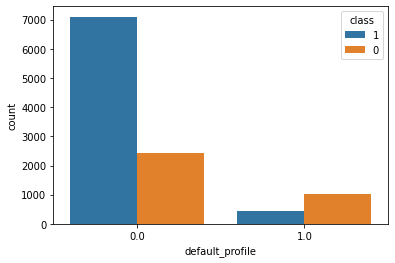

In [26]:
# Working on Feature Default profile

df['default_profile'] = df['default_profile'].fillna(0)
df['default_profile'].value_counts()
fig_1 = sns.countplot(x = 'default_profile', data = df, hue = "class")
df_model['default_profile'] =df['default_profile']

In [30]:
#description_presence was not correct in the end, look into it
#df_model['description_present'] = df_1['description_presence']
df_model['verified'] = df_1['verified']
df_model['protected'] = df_1['protected']

<ipython-input-30-bf3e66b24202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['description_present'] = df_1['description_presence']
<ipython-input-30-bf3e66b24202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['verified'] = df_1['verified']
<ipython-input-30-bf3e66b24202>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org

In [47]:
# manipulating target variable 'url' by putting 0 and 1 values
df['url'] = df['url'].fillna(0)
df.loc[df["url"] == 0, "url_present"] = 0
df.loc[df["url"] != 0, "url_present"] = 1

0.0    7509
1.0    3508
Name: url_present, dtype: int64

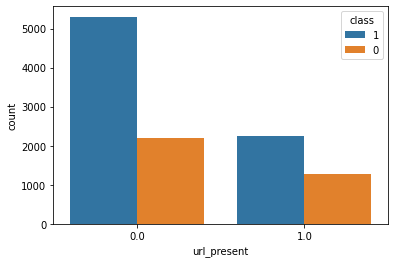

In [48]:
df['url_present'].value_counts()
fig_1 = sns.countplot(x = 'url_present', data = df, hue = "class")

#### Use Hypothesis testing to asses if there is any significant difference between the data used to plot the above graph.


In [46]:
#url_present is string based text and not analysing the data at present 
df.drop('url_present', axis =1, inplace = True)

In [49]:
#df_model['url_present'] = df['url_present']

<ipython-input-49-606b9c537474>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['url_present'] = df['url_present']


In [50]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 7248952 to 2910276853
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   screen_name          11017 non-null  object 
 1   statuses_count       11017 non-null  int64  
 2   followers_count      11017 non-null  int64  
 3   friends_count        11017 non-null  int64  
 4   favourites_count     11017 non-null  int64  
 5   listed_count         11017 non-null  int64  
 6   default_profile      11017 non-null  float64
 7   geo_enabled          11017 non-null  float64
 8   description_present  11017 non-null  int64  
 9   verified             11017 non-null  int64  
 10  protected            11017 non-null  int64  
 11  url_present          11017 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.1+ MB


In [51]:
df['profile_use_background_image'].fillna(0, inplace = True)

1.0    9503
0.0    1514
Name: profile_use_background_image, dtype: int64

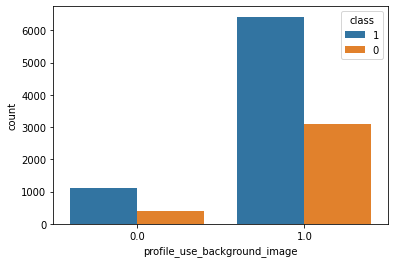

In [53]:
df['profile_use_background_image'].value_counts()
fig_1 = sns.countplot(x = 'profile_use_background_image', data = df, hue = 'class')

#### Hypothesis Testing and significance of Variable

In [54]:
df_model['profile_use_background_image'] = df['profile_use_background_image']

<ipython-input-54-11e19398f81c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['profile_use_background_image'] = df['profile_use_background_image']


In [ ]:
print(df['profile_background_color'].value_counts())

In [56]:
# Since we are using training data to set variables, we may not find the variable highly effective in the testing set.

In [57]:
# manipulating color_codes of the text to create the feature assiciated with background text color. 
df.loc[df["profile_background_color"] == '0000FF', "background_color_class"] = "0000FF"
df.loc[df["profile_background_color"] == 'C0DEED', "background_color_class"] = "C0DEED"
df.loc[df["profile_background_color"] == '131516', "background_color_class"] = "131516"
df.loc[df["profile_background_color"] == '000000', "background_color_class"] = "000000"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

others    4758
0000FF    3499
C0DEED    1837
131516     496
000000     427
Name: background_color_class, dtype: int64

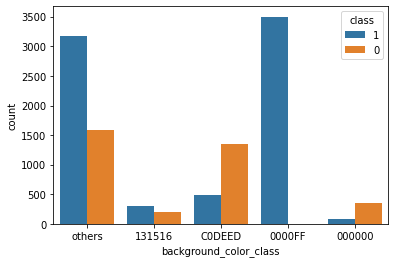

In [63]:
df['background_color_class'] = df['background_color_class'].fillna("others")
df['background_color_class'].value_counts()
fig_1 = sns.countplot(x = 'background_color_class', data = df, hue = 'class')

In [60]:
df_model['background_color_class']=df['background_color_class']

<ipython-input-60-395a947897ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['background_color_class']=df['background_color_class']


In [ ]:
print(df['profile_text_color'].value_counts())

In [ ]:
### Need to change variable encoding for 0  and 000000, since 0 represents missing value and is category in itself

In [64]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_text_color"] == '333333', "text_color_class"] = "333333"
df.loc[np.logical_or(df["profile_text_color"] == '0',df["profile_text_color"] == '000000') , "text_color_class"] = "000000"
df.loc[df["profile_text_color"] == '3D1957', "text_color_class"] = "3"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

333333    6992
other     2280
000000    1530
3          215
Name: text_color_class, dtype: int64

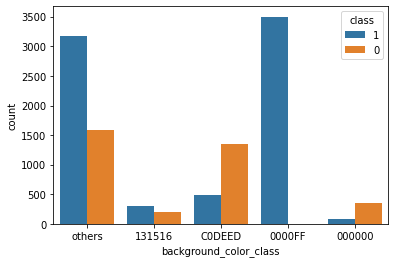

In [67]:
df['text_color_class'] = df['text_color_class'].fillna("other")
df['text_color_class'].value_counts()
fig_1 = sns.countplot(x = 'background_color_class', data = df, hue = 'class')

In [68]:
df_model['text_color_class'] = df['text_color_class']

<ipython-input-68-039978c986db>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['text_color_class'] = df['text_color_class']


In [ ]:
print(df['profile_sidebar_fill_color'].value_counts())

In [69]:
# manipulating target variable by putting 0 and 1 values
df.loc[df["profile_sidebar_fill_color"] == 'DDEEF6', "sidebar_color_class"] = "DDEEF6"
df.loc[np.logical_or(df["profile_sidebar_fill_color"] == '0',df["profile_sidebar_fill_color"] == '000000') , "sidebar_color_class"] = "000000"
df.loc[df["profile_sidebar_fill_color"] == '407DB0', "sidebar_color_class"] = "407DB0"
df.loc[df["profile_sidebar_fill_color"] == 'EFEFEF', "sidebar_color_class"] = "EFEFEF"
#df.loc[np.logical_and(df["profile_background_color"] != '131516', df["profile_background_color"] != 'C0DEED',df["profile_background_color"] != '0000FF') , "background_color_class"] = "4"

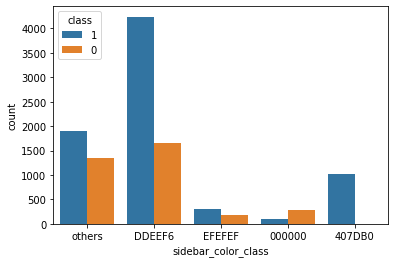

In [71]:
df['sidebar_color_class'] = df['sidebar_color_class'].fillna('others')
fig_1 = sns.countplot(x = 'sidebar_color_class', data = df, hue = 'class')

In [72]:
df_model['sidebar_color_class'] = df['sidebar_color_class']

<ipython-input-72-4b0baa6aef06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['sidebar_color_class'] = df['sidebar_color_class']


### testing for hypothesis that newly created variables have significant impact on the class

In [249]:
# https://towardsdatascience.com/how-to-test-for-statistically-significant-relationships-between-categorical-variables-with-chi-66c3ebeda7cc

In [ ]:
### create column with value count of class for the pivot table

In [ ]:
df_model['protected'] = df_1['protected']

In [ ]:
pivot_df = pd.crosstab(index = df_model['protected'], columns = df_model['class'])

###### Hypothesis: variables 'protected and class are independent'

In [ ]:
chi2, p, dof, ex = chi2_contingency(pivot_df, correction=False)
print(chi2, '{:.10f}'.format(p))

###### Hypothesis: variables 'background_color_class and class are independent'

In [ ]:
pivot_df = pd.crosstab(index = df_model['background_color_class'], columns = df_model['class'])

chi2, p, dof, ex = chi2_contingency(pivot_df, correction=True)
print(pivot_df)
print(chi2, '{:.10f}'.format(p))

###  Variable Encoding for Categorical Variables and Creates features

In [ ]:
### https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [75]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11017 entries, 7248952 to 2910276853
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   screen_name                   11017 non-null  object 
 1   statuses_count                11017 non-null  int64  
 2   followers_count               11017 non-null  int64  
 3   friends_count                 11017 non-null  int64  
 4   favourites_count              11017 non-null  int64  
 5   listed_count                  11017 non-null  int64  
 6   default_profile               11017 non-null  float64
 7   geo_enabled                   11017 non-null  float64
 8   description_present           11017 non-null  int64  
 9   verified                      11017 non-null  int64  
 10  protected                     11017 non-null  int64  
 11  url_present                   11017 non-null  float64
 12  profile_use_background_image  11017 non-null  flo

In [83]:
# Label Encoding for nominal data 
gle = LabelEncoder()
s_color_labels = gle.fit_transform(df_model['sidebar_color_class'])
s_color_mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
s_color_mappings

{0: '000000', 1: '407DB0', 2: 'DDEEF6', 3: 'EFEFEF', 4: 'others'}

In [85]:
df_model['s_color_labels'] = s_color_labels

<ipython-input-85-ea3b686a195a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['s_color_labels'] = s_color_labels


In [91]:
gen_ohe = OneHotEncoder()
s_color_f_arr = gen_ohe.fit_transform(
                              df_model[['s_color_labels']]).toarray()
feature_labels = list(gle.classes_)
gen_features = pd.DataFrame(s_color_f_arr, 
                            columns=feature_labels)

In [106]:
gen_features.head()

,000000,407DB0,DDEEF6,EFEFEF,others
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [116]:
df_model.shape

(11017, 17)

In [117]:
df_model_1 = pd.concat([df_model.reset_index(drop=True), gen_features], axis = 1)

In [121]:
df_model_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11017 entries, 0 to 11016
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   screen_name                   11017 non-null  object 
 1   statuses_count                11017 non-null  int64  
 2   followers_count               11017 non-null  int64  
 3   friends_count                 11017 non-null  int64  
 4   favourites_count              11017 non-null  int64  
 5   listed_count                  11017 non-null  int64  
 6   default_profile               11017 non-null  float64
 7   geo_enabled                   11017 non-null  float64
 8   description_present           11017 non-null  int64  
 9   verified                      11017 non-null  int64  
 10  protected                     11017 non-null  int64  
 11  url_present                   11017 non-null  float64
 12  profile_use_background_image  11017 non-null  float64
 13  b

In [126]:
df_model_1.drop(labels = ['s_color_labels', 'sidebar_color_class', 'text_color_class', 'background_color_class'],axis = 1, inplace = True)

### Exploratory Data Analysis on raw data for feature selection and data development

### Logistics model Training and testing

In [231]:
df_model_1['class']= df_1['class'].reset_index(drop =True)

In [233]:
#features
X=df_model_1.drop(columns = ['class', 'screen_name'], axis =1)
#target variable
y=df_model_1[['class']].values

##### Training the model on raw data

In [234]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (7711, 17)
Number transactions y_train dataset:  (7711, 1)
Number transactions X_test dataset:  (3306, 17)
Number transactions y_test dataset:  (3306, 1)


In [235]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.97      0.69      0.81      1095
           1       0.87      0.99      0.93      2211

    accuracy                           0.89      3306
   macro avg       0.92      0.84      0.87      3306
weighted avg       0.90      0.89      0.89      3306



/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Using Oversampling technique to increase the label count for training data

In [236]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel()) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

Before OverSampling, counts of label '1': [5332]
Before OverSampling, counts of label '0': [2379] 

After OverSampling, the shape of train_X: (10664, 17)
After OverSampling, the shape of train_y: (10664,) 

After OverSampling, counts of label '1': 5332
After OverSampling, counts of label '0': 5332


In [237]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test) 


# print classification report 
print(classification_report(y_test, predictions)) 

              precision    recall  f1-score   support

           0       0.96      0.78      0.86      1095
           1       0.90      0.99      0.94      2211

    accuracy                           0.92      3306
   macro avg       0.93      0.88      0.90      3306
weighted avg       0.92      0.92      0.91      3306



/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


##### Undersampling to assess the model accuracy when less data is present 

In [238]:
print("Before Undersampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

# apply near miss 
from imblearn.under_sampling import NearMiss 
nr = NearMiss() 

X_train_miss, y_train_miss = nr.fit_resample(X_train, y_train.ravel()) 

print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 

print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0))) 

Before Undersampling, counts of label '1': [5332]
Before Undersampling, counts of label '0': [2379] 

After Undersampling, the shape of train_X: (4758, 17)
After Undersampling, the shape of train_y: (4758,) 

After Undersampling, counts of label '1': 2379
After Undersampling, counts of label '0': 2379


In [240]:
# train the model on train set 
lr2 = LogisticRegression() 
lr2.fit(X_train_miss, y_train_miss) 
predictions = lr2.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

              precision    recall  f1-score   support

           0       0.51      0.99      0.67      1095
           1       0.99      0.53      0.69      2211

    accuracy                           0.68      3306
   macro avg       0.75      0.76      0.68      3306
weighted avg       0.83      0.68      0.68      3306



##### Fitting the model on log transformed data (variables with large range) and checking if it improves the accuracies

In [241]:
# log transformation of variables with large values for better fitting of model.

X = (pd.DataFrame([np.log(X['statuses_count']+1), np.log(X['followers_count']+1), np.log(X['friends_count']+1), np.log(X['favourites_count']+1), np.log(X['listed_count']+1), X['default_profile'], X['geo_enabled'], X['verified'], X['protected'], X['url_present'], X['profile_use_background_image'], X['000000'], X['407DB0'], X['DDEEF6'], X['EFEFEF'], X['others']]))
X = np.transpose(X)


In [242]:
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

# describes info about train and test set 
print("Number transactions X_train dataset: ", X_train.shape) 
print("Number transactions y_train dataset: ", y_train.shape) 
print("Number transactions X_test dataset: ", X_test.shape) 
print("Number transactions y_test dataset: ", y_test.shape) 

Number transactions X_train dataset:  (7711, 16)
Number transactions y_train dataset:  (7711, 1)
Number transactions X_test dataset:  (3306, 16)
Number transactions y_test dataset:  (3306, 1)


In [243]:
# train the model on train set
lr1 = LogisticRegression() 
fit_model = lr1.fit(X_train, y_train)
predictions = lr1.predict(X_test) 

# print classification report 
print(classification_report(y_test, predictions)) 

/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.98      0.95      0.96      1095
           1       0.97      0.99      0.98      2211

    accuracy                           0.98      3306
   macro avg       0.98      0.97      0.97      3306
weighted avg       0.98      0.98      0.98      3306



/home/lenovo/virtualenv/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
